In [2]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wave


$\renewcommand{\vec}[1]{\mathbf{#1}}$

## Objetivos

En este capítulo introduciremos los sistemas dinámicos y revisaremos algunos de los métodos para resolver algunos tipos de ecuaciones diferenciales ordinarias.

Estas notas son una breve introducción a la teoría que se utilizará en las simulaciones, esta muy lejos de ser un estudio completo sobre ecuaciones diferenciales

---------
Al completar este capítulo, el lector deberá poder

* Resolver determinadas ecuaciones diferenciales de primer orden tanto analíticamente, gráficamente como numéricamente.
* Entender el concepto de punto crítico y su estabilidad.
* Aplicar la teoría a diferentes modelos sencillos e interpretar las soluciones en términos físicos
* Comprender el teorema de existencia y unicidad y sus implicaciones.
* Entender el concepto de bifurcación y aplicarlo a los sistemas unidimensionales. 


## Ecuaciones diferenciales ordinarias (ODE)

### Introducción a los sistemas dinámicos

1. Modelos dinámicos:

  * Idealmente, *modelo algebraico* (explícito o implícito) 
 \begin{align}
x(t)  & = \frac{K}{1 + \left[ \frac{K-x_0}{x_0} \right]
e^{-r t} } \\
g( x, t)  & = 0 \\
t & =  \log \left| \frac{ \csc x_0 + \cot x_0}{ \csc x + \cot x}   \right|
\end{align}
 
  * No es fácil llegar a determinar las ecuaciones algebraicas para las variables de estado de un sistema mediante la observación/experimentación del mismo.  
  * ¿Qué puedo hacer? Observar el valor de las variables en diferentes instantes de tiempo y construir un modelo que *describa la variación de las variables de estado del sistema en un intervalo diferencial de tiempo*. Por ejemplo, un sistema de ecuaciones diferenciales ordinarias (ODE) describe la *velocidad* (*rate*, ritmo de variación,  ...) de las variables  $\frac{d\vec{x}}{dt} = \vec{f}(\vec{x}, \vec{a})$. La solución de las ecuaciones diferenciales es un sistema de ecuación algebraica (*o equivalente*).  

    \begin{align}
\lim_{\delta t\to 0} 
    \frac{\Delta x}{\delta t}  = 
 \lim_{\delta t\to 0} 
    \frac{\vec{x} (t+ \Delta t) - \vec{x}(t) }{\delta t}=
    \frac{dx}{dt} &= \vec{f}(\vec{x}, t, \vec{a})  
    \end{align}
   * Un modelo con mas de una variable de estado se representa por un sistema dinámico de dimensión $n$
    \begin{align}
            \dot{x_{0}} &= f_0 (x_0,  \cdots, x_n, t, \vec{a}) \\
            &\vdots\\
    \dot{x_{n}} &= f_n (x_0,  \cdots, x_n, t, \vec{a})
        \end{align}
      donde $x_0, \cdots, x_n$ representan a las variables de estado del sistema dinámico.Los puntos representan derivadas totales respecto a la variable independiente (en nuestros modelos será el tiempo $t$), i.e. $\frac{dx}{dt} = \dot{x}$. 
     Y las funciones $f_0(\cdot), \cdots, f_n(\cdot)$ junto con los parámetros $\vec{a}$ describen las interacciones entre las variables. 

   * El sistema de ODE anterior se escribirá de forma mas compacta  como 
$$
 \vec{\dot x} = \vec{f}( \vec{x}, \vec{a}, t)
$$

   * Cuando el modelo **no** depende explícitamente del tiempo, i.e.,$
 \vec{\dot x} = \vec{f}( \vec{x}, \vec{a})
$ se dice que el modelo es **autónomo**.  


2. Solución del modelo dinámico:

  * El **teorema de existencia y unicidad** de las soluciones nos asegura que si *el modelo es razonable* (las funciones $f_i$ y sus derivadas parciales son continuas, ...,) la solución del modelo existe y es única para unas  condiciones iniciales dadas. 
  Los modelos son deterministas: si conocemos las condiciones iniciales, conocemos el estado del sistema para todo tiempo $t$.
    
   * *Formalmente* la solución de un modelo dinámico es un sistema de ecuaciones algebraicas
   \begin{align*}
   x_{0} &= x_0(t) \\
   &\vdots\\
    x_{n} &= x_n(t) \\
    \end{align*}
     donde las funciones $x_0(t), \cdots, x_n(t)$ determinan el valor de las variables de estado para todo tiempo $t$. 

   * Las ecuaciones algebraicas anteriores describen la **trayectoria** de un punto de coordenadas $(x_0, \cdots, x_n)$ en un espacio n-dimensional. A este espacio se denomina **espacio de fase (phase space)** del sistema. La trayectoria representa la evolución temporal del sistema. 

   * El espacio de fases está *completamente cubierto* de trayectorias. Cada trayectoria representa la evolución del sistema a partir de unas determinadas condiciones iniciales del sistema.
   
   * Dado que para unas determinada condiciones iniciales la solución del sistema de ODE es única (**teorema de unicidad de las soluciones**) las trayectorias no se pueden cruzar. 

<img src='./imagenes/f122_trajec.jpg' width='300' height='300'/>

3. Bifurcaciones del modelo

  * Estudian el comportamiento de las soluciones frente a variaciones de los parámetros del modelo.

### Ejemplos de sistemas dinámicos

\begin{example}

Modelar el movimiento de un tren sabiendo que su velocidad $r$ es constante y que en el instante $t=0$ su posición es $x_0$

\end{example}

* La variable de estado será la posición del tren
$$
\dot x = f(x) = r
$$

* El modelo debe ser dimensionalmente correcto: en este caso $x$ tiene unidades de longitud, por tanto $r$ tiene unidades de $\mbox{longitud} \, / \,  \mbox{tiempo} $.

* Este modelo es unidimensional, lineal y autónomo.

* La solución del modelo $x=x(t)$ es monótona. ¿Por qué? Si tenemos en cuenta la definición de derivada
\begin{align}
\dot x &= \frac{dx}{dt} = \lim_{\Delta t \to 0} \frac{\Delta x}{\Delta t} 
\end{align}
podems analizar la evolución temporal de $x$ *pasito a pasito*,i.e, en incrementos de tiempo $\delta t$ pequeños. Si conocemos el valor de $x$ en un determinado instante de tiempo $t_0$, $x_0= x(t_0)$, conocemos su valor en un instante de tiempo *diferencialmente pequeño* posterior $\delta t$. 
\begin{align}
 \lim_{\delta t \to 0} \frac{ x(t_0 + \delta t) - x(t_0) }{\delta t} \simeq f(x_0)
\end{align}
Despejando en la ecuación anterior
\begin{align}
 x(t_0 + \delta t) \simeq x(t_0 ) + f(x_0) \,  \delta t
\end{align}
En nuestro modelo $f(x)$ es constante, $ f(x) = r$
\begin{align}
 x(t_0 + \delta t) \simeq  x(t_0 ) + r \, \delta t
\end{align}
Observamos que el valor de $x$ se incrementa respecto a su posición inicial $x(t_0)$  si $r >0$, y decrece si $r  <0$.

* Su solución es analítica: se puede hallar con el método de **separación de variables** (ver mas adelante) 
$$
\int dx = \int r dt
$$
* Todas las ecuaciones de la forma  $x = r t + c$ son soluciones del modelo. Una vez que se establecen las condiciones iniciales la solución de la ODE es única
$$
x(t) = r t + x_0
$$

\begin{example}**: Modelos de crecimientos de poblaciones**

Modelar el crecimiento de una población de organismos (bacterias, virus, tumores...) sabiendo que las condiciones iniciales son $x(0) = x_0$.

Considerar los modelos unidimensionales, exponencial, logístico y de Gompertz.

\end{example}


 **Modelo exponecial:**
    
* Asumimos que la velocidad de crecimiento de la población es proporcional al tamaño de la población. O lo que es lo mismo, la *velocidad de crecimiento per capita* $\left( \frac{\dot N}{N} \right) $ es constante 
$$
    \dot N = r N   
$$
 
* La constante de proporcionalidad, el ratio de crecimiento $r$, tiene dimensión del inverso del tiempo (frecuencia)
 
* El modelo tiene solución analítica. Utilizando separación de variables,
 $$
 \int \frac{1}{N} dN = \int r dt
 $$
 $$
 \log(N) = r t + C
 $$
 
* El modelo predice un crecimiento exponencial de la población $ N(t) = x_0 e^{rt} $ cuyo **tiempo característico** (el tiempo necesario para que $N$ varíe apreciablemente desde su condición inicial) es $1/r$

**Modelo logístico (logistic, catalytic):**
 
  ¿Cómo incluir en el modelo el efecto de la sobre-población y la limitación de recursos a la que se ven sometidos ciertos organismos cuando su población es muy grande?
  
   * En el modelo exponencial la *velocidad de crecimiento per cápita* ($\dot N / N$) era constante ($r$). Sin embargo si consideramos la limitación de los recursos, la *velocidad de crecimiento per cápita* debería depender de $N$. Para valores bajos de la población ($N \sim 0$) su velocidad de variación per cápita debería ser equivalente al *modelo exponencial*: al disponer de abundantes recursos el ritmo (velocidad) de crecimiento de la población no se ve afectado. Sin embargo cuando $N$ aumenta el *rate* per cápita decrece debido a la competencia por los recursos (en condiciones de escasez un organismo no se reproduce al mismo ritmo). Incluso es negativo si el tamaño de la población sobrepasase cierto umbral o factor de carga $K$. El modelo, por tanto,es no-lineal.



<table align='left'>
<tr>
<td><img src='./imagenes/growth_rate.jpg' width='300' height='300'/></td>
<td><img src='./imagenes/growth_rate_lineal.jpg' width='300' height='300'/></td>
</tr>
</table>

 
   * Como aproximación al modelo anterior asumimos una velocidad de crecimiento **per capita** es lineal en $N$, (Verhulst 1893) 

 \begin{align}
  \dot N & = r N \left( 1 - \frac{N}{K} \right)
  \end{align}
   donde $r$ representa el ratio de nacimientos de la población (número de nacimientos por unidad de tiempo), $K$ la *capacidad de carga* del modelo y $r/K$ el ratio de fallecimientos. 

* El modelo es de orden uno, no-lineal y autónomo
* El modelo admite solución analítica utilizando separación de variables
  $$
  N(t)  = \frac{K}{1 + \left[ \frac{K-N_0}{N_0} \right]
e^{-r t} }
  $$
  

In [3]:
# Program 2b: The logistic equation.
from sympy import dsolve, Eq, Function, symbols

t = symbols('t')
r = symbols('r')
K=symbols('K')
N=symbols('N', cls=Function)
sol=dsolve( Eq(N(t).diff(t), r * N(t)*(1 - N(t)/K) ), N(t))
           
print(sol)

Eq(N(t), K*exp(C1*K + r*t)/(exp(C1*K + r*t) - 1))


En la siguiente gráfica se representa la solución del modelo $N=N(t)$ para diferentes condiciones iniciales $N_0$.

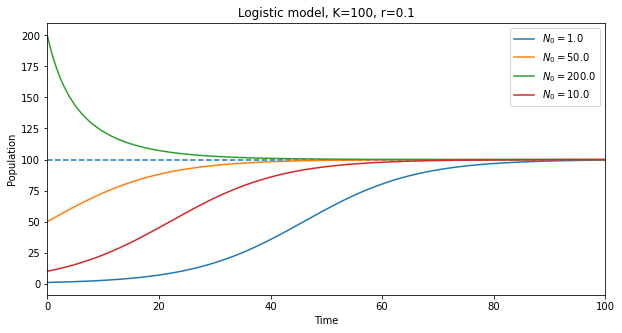

In [14]:
##### ref: Modelo logistico
def sol_logistic (t, K, r, n_0):
    n = K / (1 + ((K-n_0)/n_0) * np.exp(-r*t))
    return n

#Main programm
T = 100
r = 0.1
K = 100
n_0 = np.array( [1, K/2, 2*K, K/10])


fig,  ax = plt.subplots (1, 1, sharex=True, sharey=True, figsize=(10, 5))

t = np.linspace (0, T, 1000)
for n in n_0:
    y =  sol_logistic (t, K, r, n)
    ax.plot (t, y, label=f'$N_0=${n}')
 
ax.set_ylabel ('Population')
ax.set_xlabel ('Time') 
ax.set_title (f'Logistic model, K={K}, r={r}')  
ax.hlines (y=K,xmin=0, xmax=T, linestyles='--') 
ax.legend(loc='best')

plt.margins(x=0)
plt.show()

* La curva en que $N$ varía con el tiempo $t$ se conoce *sigmoide* y aparece en campos muy diferentes (por e.g. en redes neuronales artificiales, la función de activación de las neuronas se reprsenta por una sigmoide).  
* ¿Es necesario resolver analíticamente el modelo para tener un conocimioento *cualitativo* de su solución? No.
* ¿Cómo hallar la solución gráfica en el espacio de fases 1-dimension?
 \begin{align*}
 \dot N = & f(N)  &  \text{con}\\
 f(N) = & r N \left( 1 - \frac{N}{K} \right)
 \end{align*}
 
>1. Debemos obtener los puntos críticos del modelo: Los puntos son aquellos valores de $N^*$ para los cuales  $f(N^*) = 0$.
> En este caso el modelo tiene dos puntos críticos: $N_1^* = 0$ y $N_2^*= K$
>
>2. Determinar la estabilidad de los puntos críticos. 
>   Para ello se analiza el comportamiento de las trayectorias de $N$ en la proximidad de los puntos críticos (a la derecha y a la izquierda de cada uno de los puntos críticos). Si te fijas un punto crítico $N^*$ será estable cuando  $f'(N^*) < 0$ e inestable cuando  $f'(N^*) > 0$. 
    .
>3. Construir la gráfica N = N(t) para diferentes condiciones iniciales.




<table align='left'>
<tr>
<td><img src='./imagenes/f233_growth_phase.jpg' width='300' height='300'/></td>
<td><img src='./imagenes/f234_growth_sol.jpg' width='300' height='300'/></td>
</tr>
</table>

**Modelo de Gompertz**

Es un modelo empírico. El modelo, i.e., la ecuación diferencial, se ha construído a partir de la observación de la *tasa de variación* del tamaño de la población (i.e., de la velocidad $\frac{dN}{dt}$ de la población)   

 \begin{align}
  \dot N & = 
  r N \log \left( \frac{K}{N} \right)
  \end{align}
  

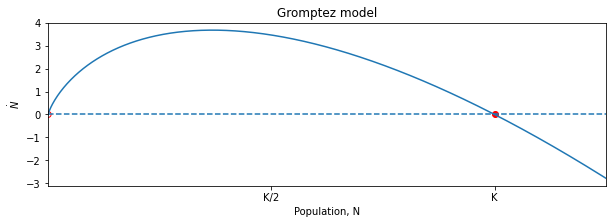

In [16]:
#####ref: Gompertz Model
def f(n, r, K):
    return r*n*np.log(K/n)


r= 0.1
K = 100
n_max = 125
n = np.linspace( 0.0001, n_max, 1000)

fig,  ax = plt.subplots (1, 1, sharex=True, sharey=True, figsize=(10, 3))

ax.plot(n, f(n, r, K))
ax.hlines (y=0,xmin=0, xmax=n_max, linestyles='--') 
ax.set_xlabel ('Population, N') 
ax.set_ylabel (f'$\dot N$')
ax.set_xticks([K/2, K])
ax.set_xticklabels(['K/2', 'K'])
ax.set_title ('Gromptez model')  

# Critical points
ax.scatter(K, 0, facecolors='red')
plt.scatter(0, 0, facecolors='none', edgecolors='r')

plt.margins(x=0)
plt.show()

  $$
  N(t) = K  e^{\log \left( \frac{N_0}{K} \right) \exp^{-r t} }
  $$

In [6]:
# Program 2b: The Gompertz model.
from sympy import dsolve, Eq, Function, symbols, log

t = symbols('t')
r = symbols('r')
K=symbols('K')
N=symbols('N', cls=Function)
sol=dsolve( Eq(N(t).diff(t), r * N(t)*log(K/N(t))) , N(t) )
           
print(sol)

Eq(N(t), K*exp(C1*exp(-r*t)))


El modelo de Gompertz se aplica en campos muy diversos. Desde la modelización de propogación de epidemias 
(por e.g COVID [Sánchez-Villegasa and Codina] hasta el control de stocks en mercados financieros [Caravelli et al.]

**Relación entre los modelos logístico y Gompertz**

Teniendo en cuenta que 
$$
\lim_{\alpha \to \infty} \alpha \left( 1-  x^{\frac{1}{\alpha} } \right)  = \log(x)
$$
podemos expresar los modelos logísticos y de Gompertz como casos particulares de la  ecuación diferencial general
$$
\dot N = r \, N \, \alpha \,  \left( 1 - \left( \frac{N}{K} \right)^{1/\alpha} \right)
$$
para los casos límites de  $\alpha = 1$ y $\alpha \to \infty$ respectivamente

\begin{example}: **Modelos de propagación de enfermedades (SIR)**


Suponga el siguiente modelo de transmisión de una infección
\begin{align}
    \dot S &= - \beta S  I \\
    \dot I &= \beta S  I  - \gamma I \\
    \dot R &= \gamma I
\end{align}

El modelo es de dimensión tres, $S$ representa la cantidad de individuos susceptibles de ser infectados, $I$ los infectados y $R$ los recuperados. Se modelan los flujos (relaciones) entre las variables.

* En el modelo más simple el tamaño de la población permanece constante $N = S(t) + I(t) + R(t)$. En estas condiciones el modelo es de dimensión dos $R(t) = N- S(t) - I(t)$.
* Los parámetros $\beta, \gamma >0$. 
* La velocidad  a la que varían los susceptibles $S$ siempre es negativa: los susceptibles no pueden crecer. La velocidad de decrecimiento es proporcional al número de infectados $I$. El coeficiente de proporcionalidad se denomina *tasa de crecimiento* $\beta$ (*dissase transmision rate*)
* La velocidad a la que varían los infectados $ \dot I = - \dot S  - \dot R$ incluye un término positivo, la función $S(t)$ es monótona decreciente, y uno negativo, $R(t)$ es monótona creciente.  
* Los *recuperados* son proporcionales a los infectados. Los recuperados quedan inmunizados, no pueden volver a ser susceptibles.  En caso contrario la ecuación de los susceptibles debería incluir un término positivo proporcional a los recuperados (modelo SIS). 
* El coeficiente $\gamma$ es la tasa de recuperación. Su inverso es el tiempo durante el cual un infectado puede seguir infectando antes de considerarse recuperado. Por e.g., los estudios preliminares sobre COVID-19 lo cifran entre 6.5 y 10 días, en este caso  $\gamma \in [1/10, 1/6.5]$.   
* En el modelo se está asumiendo que no se producen fallecimientos entre los infectados. 
* El coeficiente $\Re(t) = \beta S / \gamma N$ se denomina índice de reproducción. Si $\Re > 1$ la epidemia se propaga. 
* El modelo tiene un punto de equilibrio (no enfermedad) en $S=N, I =0, R=0$. 


*Mas allá del modelo SIR...:*

* Modelo SEIR incorpora una dimensión mas. Los individuos pueden estar en estado *expuesto*.

* Tanto el modelo SIR como SEIR son modelos de **campo medio**. Otras estrategia de simulación de epidemias son los modelos basados en agentes y grafos donde se modela el comportamiento social de los individuos. En estos modelos los valores medios de $S$, $R$ e $I$ se estiman promediando sobre el estado de los vértices o los agentes del modelo.  

* El modelo SIR / SEIR es determinista. Los modelos de epidemias no determinista se simulan habitualmente con cadenas de Markov o con modelos SDE (stochastic differential equations) (Linda 2017)

* Modelos en los que los parámetros no son constantes. El modelo deja de ser válido cuando el sistema no está aislado. Por ejemplo, las políticas de intervención de las administraciones (confinamientos, mascarillas,...) modifican el valor de $\beta$. En esas condiciones la dinámica del modelo se rige por la dinámica de $\beta = \beta(t)$.

\end{example}


**Tipos de ODE**

Suponga un sistema de ODEs:

 $$
 \vec{\dot x} = \vec{f}( \vec{x}, \vec{a}, t)
 $$
 
 Algunas de sus características mas importantes son:

* *Linealidad*: El sistema será lineal cuando  $\vec{f}$ sea lineal respecto a $x$ y $\dot x$. Ejemplos habituales de no-linealidades son los productos, potencias y funciones de $x_i$. como por ejemplo $x_1, x_2, (x_1)^3, \sin(x_1)$. 

    A diferencia de los sistemas lineales, la mayoría de los sistemas no-lineales no admiten soluciones analíticas. ¿Por qué los sistemas no lineales son más difíciles de analizar que los lineales? La diferencia esencial radica en que los sistemas lineales pueden dividirse en partes. Las parte pueden resolverse independientemente y finalmente recombinarse para obtener la respuesta del sistema. Esta estrategia permite las simplificación de problemas complejos y es la base de métodos como los modos normales, las transformadas de Laplace, los argumentos de superposición y el análisis de Fourier. La respuesta de un sistema lineal es igual a la suma de las respuestas de sus partes. Pero muchas veces la naturaleza no actúa de esta manera. Cuando las partes de un sistema interfieran, cooperen o compitan, se producirán interacciones no lineales y el principio de superposición no será apropiado.

* *Autónomo*: Cuando $\vec{f}$ no depende explícitamente del tiempo se dice que el sistema es autónomo. Nosotros analizaremos fundamentalmente sistemas autónomos. 

* *Orden de una ecuación*: Es el orden de la mayor de las derivadas incluida en una ecuación. Una ODE de orden $n$ es equivalente a un sistema de $n$ ODEs de orden 1. El número de condiciones iniciales que se deben fijar en el sistema es igual a su dimensión. 

\begin{example} **Equivalencia entre el orden de una ODE y la dimensión de un sistema**

Suponga el siguiente modelo para simular las oscilaciones de un péndulo: 

$$
     m \ddot{\theta} + \frac{g}{l} \sin \theta = 0
$$
donde $\theta$ es el ángulo del péndulo medido desde la vertical. Si definimos la variable $y =  \dot \theta$ el sistema anterior es equivalente al sistema autónomo, no-lineal de orden dos 
    \begin{align}
    \dot \theta = & \nu \\
    \dot \nu = & - \frac{g}{l} \sin{\theta} 
    \end{align}

* La no-linealidad del péndulo hace muy difícil resolver el problema analíticamente, hay que recurrir a funciones elípticas.
La solución habitual consiste en **linealizar** el sistema substituyendo $\sin(\theta)$ por el primer término de su desarrollo  de Taylor $\sin \theta \approx x$. Esta aproximación es válido para pequeñas oscilaciones $\theta \sim 0$, esto es, cuando el ángulo $\theta$ permanece muy próximo a la vertical. A diferencia del modelo no-lineal, este nuevo modelo (abstracción del sistema físico) sí admite una solución analítica. Sin embargo el modelo lineal no permite simular ciertos comportamientos del sistema, por ejemplo, las oscilaciones del péndulo cuando este sobrepasa la vertical. 
En este tema veremos como extraer información de modelos no-lineales sin necesidad de resolverlo analíticamente.

\end{example}


## Solución analítica sistemas de una dimensión

**Separación de variables**

En los sistemas en una dimensión $\dot{x}  =  f( x, a, t)$ cuando $f$ es factorizable  $f = f(x) g(t)$ se puede aplicar el método de separación variables:

\begin{align}
\dot{x}  =  f( x, a, t) & = f(x) g(t) \\
\int \frac{1}{f(x)} dx & = \int g(t) dt
\end{align}
que permite obtener soluciones analíticas cuando se conozca la integral de $\frac{1}{f(x)}$ y $g(t)$.

\begin{example}
$$
\dot x = -\frac{t}{x}
$$
\end{example}

*Solución:*
\begin{align}
 x^2 + t^2 &= C 
\end{align}

In [3]:
#  A program that solves a simple ODE.

from sympy import dsolve, Eq, symbols, Function

t = symbols('t')
x = symbols('x', cls=Function)
deqn1 = Eq(x(t).diff(t), -t / x(t))
sol1 = dsolve(deqn1, x(t))

print(sol1)

[Eq(x(t), -sqrt(C1 - t**2)), Eq(x(t), sqrt(C1 - t**2))]


## Análisis sistemas dinámicos en una dimensión 

### Análisis del espacio de fases

\begin{example}

Analice las soluciones de la ODE, $\dot x = f(x)$ siendo $ f(x) = \sin x$

La solución analítica cuando $x(0) = x_0$ es

$$
t = \log \left| \frac{ \csc x_0 + \cot x_0}{ \csc x + \cot x}   \right|
$$
\end{example}

Receta para hallar la solución gráfica en el espacio de fases de 1-dimensión:

1. Determinar los puntos críticos $x$ del modelo calculando las raíces de $f(x^*) = 0$
2. Obtener la estabilidad de los puntos críticos del modelo analizando el comportamiento de las trayectorias en la proximidad de los puntos críticos: si $f'(x^*) < 0 $ el punto crítico $x^*$ es estable, si $f'(x*) > 0 $, $x^*$ es inestable.
3. Construir le gráfico x = x(t) para diferentes condiciones iniciales




<table align='left'>
<tr>
<td><img src='./imagenes/f211_sin.jpg' width='300' height='400'/></td>
<td><img src='./imagenes/f213_sin_sol.jpg' width='200' height='100'/></td>
</tr>
</table>

### Análisis de estabilidad

Hasta ahora hemos desarrollado un método gráfico para determinar la estabilidad de los puntos de equilibrio: analizando el comportamiento de las trayectorias en las proximidades de los puntos de equilibrio. Sin embargo a menudo se requiere una estimación cuantitativa.  

Sea $\eta(t)  = x(t) - x^*$ la distancia al punto de equilibrio $x^*$ en un determinado instante de tiempo. Supongamos que $\eta$ es pequeña (es una perturbación pequeña, para $t=t_0$ el sistema está cerca de su punto de equilibrio). Estamos interesados en saber como evolucionará la perturbación en el tiempo: si la perturbación crece, el sistema se alejará del punto de equilibrio, pero si la perturbación decrece se acercará a $x^*$ a medida que transcurra el tiempo. En el primer caso el punto de equilibrio sera inestable y en el segundo estable. Como no conozco $x(t)$, se planteará la ODE correspondiente $\eta$ y se resolverá.

Diferenciando en la expresión de $\eta$ se obtiene,
$$\dot \eta = \dot x = f(x)$$ 
Como  $\eta(t)$ es una pequeña perturbación, puedo desarrollar $f$ en serie de Taylor entorno a $x^*$   
$$ f(x^* + \eta) = f(x^*) + f'(x^*) \eta + O (\eta^2)$$
Pero $f(x^*) =0$ al ser $x^*$ un punto de equilibrio, simplificándose la expresión anterior 
$$ f(x^* + \eta) =  f'(x^*) \eta + O (\eta^2)$$
Además si $f'(x^*) \neq 0$ se pueden despreciar los términos de orden superior, obteniendo finalmente la ODE 
$$\dot \eta = f'(x^*) \eta $$
cuya solución es
$$
\eta(t) = C e ^{f'(x^*) t }
$$

Esta ecuación es muy significativa:
* Si $f'(x^*) > 0$ la perturbación crecerá aumenta la distancia al punto de equilibrio $x^*$. El punto de equilibrio es inestable
* Si $f'(x^*) < 0$ la distancia disminuye. El punto de equilibrio es estable.
* En ambos casos la solución a la ODE de la perturbación es una exponencial de tiempo característico  $ 1 / f'(x^*)$ . Recordar que el tiempo característico es el tiempo necesario que debe transcurrir para que la variable, en este caso $\eta$, varíe apreciablemente en las cercanías de $x^*$. 

## Bifurcaciones

Cambio cualitativo en la dinámica de un sistema cuando alguno de los parámetros del sistema se modifica. En una dimensión, $\dot x = f(x; \mu)$, las bifurcaciones mas importantes son:

* Saddle-node: $f(x;\mu) = \mu - x^2$
* Transcritical: $f(x) = \mu  x - x^2$
* pitcfork: $\mu x - x ^3$



**Saddle-node bifurcation**

\begin{example}

Suponga la ODE
$$
\dot  v = I + v^2
$$

siendo $I < 0$. Analice sus bifurcaciones

*Solución*

1. Puntos de equilibrio.
Para hallar los puntos de equilibrio se deben buscar la raíces del sistema $I + v^2 = 0$.
El sistema tendrá dos puntos de equilibrio $v = - \sqrt{-I}$ (estable)
y $v =  \sqrt{-I}$ (inestable).

2. Análisis de bifurcaciones. Incrementar el valor del parámetro $I$ paulatinamente.

No hay ningún cambio cualitativo en las soluciones del sistema hasta que se llega a la bifurcación $I=0$. En la bifurcación se fusionan los dos puntos de equilibrio. Después de la bifurcación el sistema **no** tiene puntos de equilibrio.

\end{example}

<img src='./imagenes/bifur_1d_saddle_node.jpg' width='300' height='300'/>

\begin{example}


El potencial de membrana de una neurona en los modelos unidimensionales
$$
\dot v = F(v)
$$
donde $F(v)$ tiene la forma  $F(v) = I + g(v) $ donde $I$ simula la excitación a la que se ve sometida la neurona (habitualmente una corriente externa). 
\end{example}

<img src='./imagenes/neuron_1d_bifur.jpg' width='500' height='500'/>

<img src='./imagenes/bifur_1d_neuron.jpg' width='500' height='500'/>

**Transcritical bifurcation**

 $\dot x = r  x - x^2$
 
 Cuando el parámetro $r<0$ el sistema tiene 2 puntos críticos $x=0$, estable, y $x=-r$, inestable. El sistema tiene una bifurcación *transcrítica* en $r=0$. Tras la bifurcación el sistema sigue teniendo dos puntos críticos. Sin embargo el punto crítico inestable que estaba en $x=-r$ ha desaparecido y en su lugar ha surgido un punto crítico estable en $x=r$. Además el punto crítico en $x=0$ ha perdido inestabilidad.   

<table align='left'>
<tr>
<td><img src='./imagenes/transcritical_din.jpg' width='500' height='500'/></td>
<td><img src='./imagenes/transcritical.jpg' width='500' height='500'/></td>
</tr>
</table>

**Pitchfork (tenedor) bifurcation**

$$ \dot x = rx - \alpha x^3$$

* Para $\alpha > 0$
se dice que la bifurcación es *super-critica*. En este caso si $r>0$ los puntos de equilibrio son $x=0$, inestable, y $x = \pm \sqrt{\frac{r}{\alpha}}$, estables. Para $r<0$ el único punto crítico es $x=0$, estable. 

* Para $\alpha < 0$ la bifurcación es *sub-critica*.

En la figura se ha representado $\dot x$ frente a $x$ para un sistema que muestra una bifurcación de tipo pitchfork super-crítica. 
En la siguiente figura se muestran los diagramas de bifurcación de las bifurcaciones pitchfork super y sub-crítica.

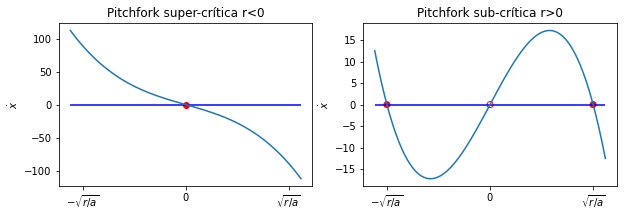

In [8]:

fork = lambda x, r, a: r*x - a *x**3

def plot_panel (x, ax, i, r, a, text, limits=(-5, 5), points=False):
    ax[i].plot(x, fork(x, r, a))
    ax[i].hlines (y=0, xmin=limits[0], xmax=limits[1], linestyles='solid', color='b') 
    #ax[i].axvline (x=0,  linestyles='solid', color='b') 
    ax[i].set_title (f'{text}') 
    ax[i].set_ylabel (r'$\dot{x}$')
    ax[i].set_xticks([-np.sqrt( abs(r)/abs(a)),0, np.sqrt( abs(r)/abs(a)) ])
    ax[i].set_xticklabels([r'$-\sqrt{r/a}$', '0', '$\sqrt{r/a}$'])
    if points == True:
        ax[i].scatter([-np.sqrt(r/a),0, np.sqrt(r/a)], [0,0, 0], 
                      edgecolors=['red','red','red'],
                      facecolors=['red', 'none','red'])
    else:
        ax[i].scatter(0, 0, color='red')
    
fig,  ax = plt.subplots (1, 2, sharex=True, sharey=False, figsize=(10, 3))
x = np.linspace(-5, 5, 100)

limits=(-5, 5)

plot_panel(x, ax=ax, i=0, r=-10, a=0.5, limits=limits, text="Pitchfork super-crítica r<0")
plot_panel(x, ax=ax, i=1, r=10,  a=0.5, limits=limits, text="Pitchfork sub-crítica r>0", points=True)


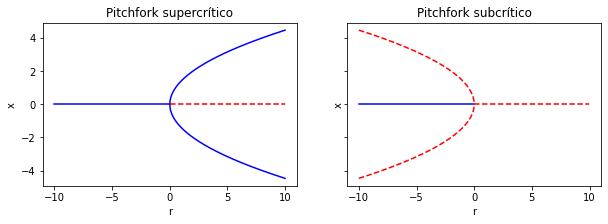

In [9]:

def bifurcation (r, a):
    up = np.sqrt (np.abs(r) / np.abs(a))
    down = -up
    return up, down

def plot_bifurcation (ax, i, a):
    r_left = np.arange(-10,0,0.01)
    r_right =  np.arange(0,10,0.01)
    zeros =  np.zeros(len(r_left))
    ax[i].plot (r_left, zeros, color='b')
    ax[i].set_xlabel('r')
    ax[i].set_ylabel('x')
    if a>0:  # super
        up, down = bifurcation (r_right, a)
        ax[i].plot (r_right, up, color ='b')
        ax[i].plot(r_right, down, color='b')
        ax[i].plot(r_right, zeros, '--', color='r')
        ax[i].set_title ("Pitchfork supercrítico")
    else :
        up, down = bifurcation (r_left, a)
        ax[i].plot (r_left, up, '--', color ='r')
        ax[i].plot(r_left, down, '--', color='r')
        ax[i].plot(r_right, zeros, '--', color='r')
        ax[i].set_title ("Pitchfork subcrítico")


fig,  ax = plt.subplots (1, 2, sharex=True, sharey=True, figsize=(10, 3))
plot_bifurcation(ax, i=0, a=0.5)
plot_bifurcation(ax, i=1, a=-0.5)

plt.margins(x=0)
plt.show()

       

## Integración numérica

### Método de Euler

Suponga una partícula *inmersa en el fluido* que en el instante $t_0$ se hallase en la posición $x_0$. Su velocidad sería $f(x_0)$. Por tanto en el siguiente intervalo de tiempo $\Delta t$ se desplazaría una cantidad $f(x_0) \Delta t$  y su nueva posición $x_1$ sería
$$
x(t_0 + \Delta t) \approx  x_1 = x_0 + f(x_0) \Delta t
$$
y para intervalos iguales de tiempo tendríamos la ley de recurrencia 
$$
x_{n+1} = x_n + f(x_n) \Delta t
$$

<img src='./imagenes/f281_euler.jpg' width='300' height='300'/>

### Método de Euler mejorado (*Heun's method*)

Un problema con el método de Euler es que estima la derivada solo en el extremo izquierdo del intervalo de tiempo $[t_n,  t_{n +1}]$. Sería mas prometedor utilizar el promedio de las derivadas al principio y al final del intervalo. Ésta es la idea que subyace detrás del *método Euler mejorado*. 
Primero se *estima* la posición $\tilde{x}_{n+1}$ con el el método de Euler. A continuación se utiliza $\tilde{x}_{n+1}$  para estimar el valor de la derivada al final del intervalo $f(\tilde{x}_{n+1})$. Finalmente, se promedias las derivadas en ambos extremos del intervalo, $f(x_n)$ y $f(\tilde{x}_{n+1})$,  para obtener el valor definitivo de $x_{n+1}$,
\begin{align*}
\tilde{x}_{n+1} = & x_n + f(x_n) \Delta t \\
x_{n+1} = & x_n + \frac{1}{2} 
\left[ f(x_n) + f(\tilde{x}_{n+1}) \right] \Delta t
\end{align*}


* Este método es más preciso que el método de Euler, en el sentido de que tiende a cometer un menor error $E = | x (t_n) - x_n |$ para un tamaño dado $\Delta t$. En ambos casos, el error $E \rightarrow 0$ cuando $\Delta t \rightarrow 0$, pero el error disminuye más rápidamente para el método de Euler mejorado. Se puede demostrar que $E \propto \Delta t$ en el método de Euler y  $E \propto \left( \Delta t \right)^2$ para el método de Euler mejorado. El método de Euler es de primer orden, mientras que el método de Euler mejorado es de segundo orden.


### Método de Runge-Kutta (*classic rk fourth-order method*)


Se han desarrollado métodos de tercer, cuarto e incluso de orden superior. Sin embargo los métodos de orden superior no son necesariamente superiores. Los métodos de orden superior requieren más cálculos y evaluaciones de funciones, por lo que hay un costo computacional asociado con ellos. En la práctica, se logra un buen equilibrio mediante este método de Runge-Kutta de cuarto orden: 

\begin{align*}
k_1 = & f(x_n) \Delta t \\
k_2  = & f \left( x_n + \frac{1}{2} k_1 \right) \Delta t \\
k_3  = & f \left( x_n + \frac{1}{2} k_2 \right) \Delta t \\
k_4  = & f \left( x_n + k_3 \right) \Delta t
\end{align*}

* $k_1$ es simplemente la predicción de Euler  del final del intervalo.
* En $k_2$ se evalúa la pendiente en mitad del intervalo utilizando la predicción de Euler para el intervalo.
* $k_3$ es bastante similar a $k_2$ excepto que en vez de utilizar $k_1$, se utiliza $k_2$ como estimación del fin del intervalo
* $k_4$ evalúa $f$ en el extremo derecho del intervalo utilizando la predicción de $k_3$ para el fin del intervalo. 

$$
x_{n+1} = x_{n} + \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)
$$

### Notación matricial

Los métodos que hemos visto (Euler, Euler mejorado y Runge-Kutta de 4 orden) pertenecen a la familia de métodos iterativos de Runge-Kutta. 
Los diferentes métodos se pueden expresar de forma compacta con el formalismo matricial de Butcher  

\begin{align*}
k_1 = & f(x_n) \Delta t \\
k_2  = & f \left( x_n + a_{21} k_1 \right) \Delta t \\
k_3  = & f \left( x_n + a_{31} k_1 + a_{32} k_2 \right) \Delta t \\
 \vdots & \\
k_n  = & f \left( x_n + \sum_{j=1}^{n-1} a_{nj} k_j \right) \Delta t
\end{align*}

$$ 
x_{n+1} = x_n + \sum_{i=1}^s b_i k_i
$$

Donde se utiliza la notación matricial para los coeficientes $a_{ij}$ y $b_i$
$$
\left(
\begin{array}{c|c c c c} 
	c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\
    c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\ 
 \vdots & \vdots & \vdots & \ddots &\vdots\\ 
    c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ 
 \hline 
       & b_1     & b_2   &  \cdots & b_n
\end{array}
\right) 
$$

* En el caso de $rk4$ la matriz anterior seria

$$
\left(
\begin{array}{c|c c c c} 
	0    & 0   & 0   & 0 & 0 \\
    1/2  & 1/2 & 0   & 0 & 0 \\
    1/2  & 0   & 1/2 & 0 & 0 \\
    1    & 0   & 0   & 1 & 0 \\
 \hline 
       & 1/6  & 1/3   & 1/3 & 1/6
\end{array}
\right) 
$$

Pra rk4 el error se comporta como  $E \propto \left( \Delta t \right)^4$
* En Euler mejorado
$$
\left(
\begin{array}{c|c c } 
	0    & 0   & 0    \\
    1    & 1  & 0    \\
 \hline 
       & 1/2  & 1/2  
\end{array}
\right) 
$$


## Ápendice

<img src='./imagenes/cuadro.jpeg' width='800' height='800'/>

**Referencias**

* S.H. Strogatz, *Non linear dynamics and chaos with applications to physics, biology and engineering*,  Taylor & Francis Inc (2014).
* J. Harris et al., NBER working paper (2020).
https://www.nber.org/system/files/working_papers/w26917/w26917.pdf
* Linda, *A primer on stochastic epidemic models: Formulation, numerical simulation, and analysis*. Infectious Disease Modelling Vol 2, pp 128-142 (2017).
* P. Sánchez-Villegasa and A. Daponte Codina https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7256556
* F. Caravelli, L. Sindoni, F. Caccioli, and C. Ududec, Phys. Rev. E 94, 022315 – Published 23 August 2016
